# Extra Material for Lesson 3

Now that you know how to perform multivariate data analysis, you can dive into some extra content! This jupyter notebook covers multivariate Pandas plotting, which allows you to plot a Pandas dataframe directly, and some plots that are a bit less common than those shown in lesson three. Please refer to lesson three if you get stuck, and do not worry if you do not fully understand what is going on with some examples (mosaic plot and segmented bar chart, more specifically). Remember that playing around with other data sets will help you grasp the content better, so feel free to explore! 

In [65]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from statsmodels.graphics.mosaicplot import mosaic

# Import csv file
penguins = pd.read_csv("penguins_wrangled.csv")

# Pandas plotting

We can directly plot pandas data frames by using the plot( ) method. Inside the parenthesis we can include a wide variety of parameters, but we will be mainly using the following:

* **kind** : (String) Used to indicate the type of graph. Line, hist, box, density, scatter, etc.
* **x** : (String)/ Name of the column to be used.
* **y** : (String) Name of the coumn to be used.
* **figsize** = (Tuple) Used to indicate the size (width, height).
* **title** = (String) Defines the graph's title.
* **color** = (String) Indicates the graph's color.
* **xlabel** = (String) Indicates the x axis' title.
* **ylabel** = (String) Indicates the y axis' title.

**Structure:**
* pdDataFrame.plot(kind = typeOfGraph, x = "columnName", ...)

### Scatter Plot

In [17]:
# Let's import a csv file to continue doing some plotting. To do so, we are going to use pandas' function read_csv().
who_data = pd.read_csv("WHO_first9cols.csv")

# We can look at the first 5 rows by using head()
who_data.head()

,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total
0,Afghanistan,1,1,151.0,28.0,NaN,NaN,NaN,26088.0
1,Albania,2,2,27.0,98.7,6000.0,93.0,94.0,3172.0
2,Algeria,3,3,6.0,69.9,5940.0,94.0,96.0,33351.0
3,Andorra,4,2,NaN,NaN,NaN,83.0,83.0,74.0
4,Angola,5,3,146.0,67.4,3890.0,49.0,51.0,16557.0


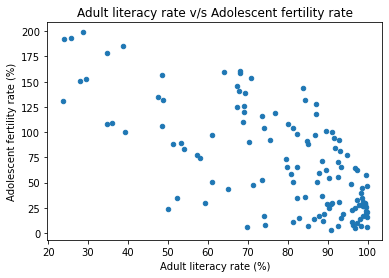

In [19]:
# We will use plot() again, and change the desired parameters
who_data.plot(kind = "scatter", x = "Adult literacy rate (%)", y = "Adolescent fertility rate (%)")

# Add title 
plt.title("Adult literacy rate v/s Adolescent fertility rate")

# Show plot
plt.show()

### Mosaic Plot

Mosaic plots are another helpful data visualization to understand the proportions of groups in our data. These plots are a variant of the segmented bar chart, except they tend to visual area better. 

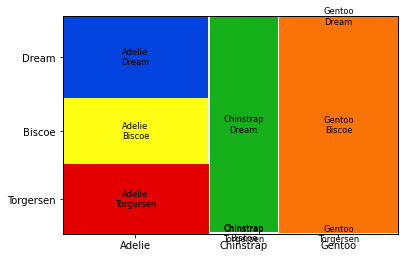

In [67]:
# Map colors to combinations
props = {}
props[('Adelie', 'Torgersen')] = {'color': 'xkcd:red'}
props[('Adelie','Biscoe')] = {'facecolor': 'xkcd:yellow'}
props[('Adelie','Dream')] = {'facecolor': 'xkcd:blue'}
props[('Chinstrap','Dream')] = {'facecolor': 'xkcd:green'}
props[('Gentoo','Biscoe')] = {'facecolor': 'xkcd:orange'}

# Plot using mosaic function
mosaic(data = penguins, index = ["Species", "Island"], statistic = False, 
       properties = props)

# Show plot
plt.show()

### Segmented Bar Chart

Segmented (or stacked) bar charts represent the "whole" of our data as one bar, and divides the bar proportionally into segments corresponding to the percentage of each group. They are a helpful way to understand the makeup of one variable based off of the categories of another. Let's practice how we can make these helpful charts in Python. 

In [58]:
# Create a cross tabulation with proportions
prop_one = pd.crosstab(penguins["Island"], penguins["Species"], margins = True, normalize = "index")

# Print proportion table
print(prop_one)

Species      Adelie  Chinstrap    Gentoo
Island                                  
Biscoe     0.269939   0.000000  0.730061
Dream      0.447154   0.552846  0.000000
Torgersen  1.000000   0.000000  0.000000
All        0.438438   0.204204  0.357357


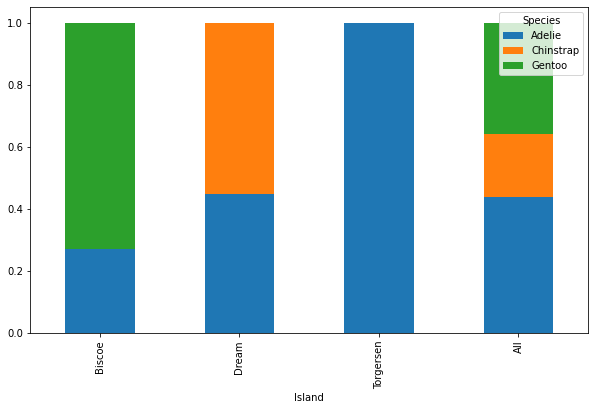

In [60]:
# Build the plot using proportions
prop_one.plot(kind = "bar", stacked = True,figsize = (10, 6))

# Display the graph
plt.show()

### Scatter Plot using Matplotlib

Scatter plots are a helpful way to visualize the relationship between two variables in statistics. Using the Matplotlib library, we can create scatter plots for the same Penguins dataset that we have been working with thus far.

**Structure:**
* plt.scatter(dataframe["columnOne"],dataframe["columnTwo"], c = "color", alpha = number, marker = "symbol")

**Arguments**: 
* x = quantitative variable of choice from our dataframe
* y = quantitative variable of choice from our dataframe
* c = colors each data point
* marker = symbol to mark each data point
* alpha = a stylistic parameter that changes the transparency of points, and helps us determine where there may be many points on the scatter plot

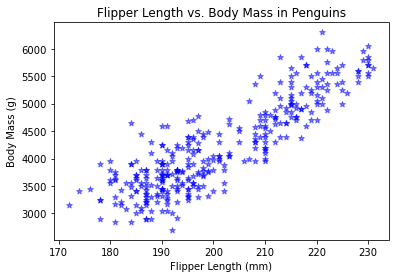

In [61]:
# Draw the scatter plot
plt.scatter(penguins["Flipper Length (mm)"], penguins["Body Mass (g)"], c = "blue", marker = "*", alpha = 0.5)

# Add x-axis and y-axix labels
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")

# Add a title
plt.title("Flipper Length vs. Body Mass in Penguins")

# Display the graph
plt.show()

### Segmented Bar Charts
Segmented bar plots are a final data visualization method that is particularly useful for comparing two categorical variables and one quantitative variable. This dataset is far from creating a perfect example of when to use a segmented bar plot, but for the sake of time, we are going to proceed with this dataset. (We would prefer another dataset for our final materials.) Let's say we were interested in knowing the total body mass of all penguins in this dataset. With a segmented bar plot, we can practice using color and formatting to compare the body mass of different species, and how sex may also play into the overall body mass.

**Parameters for sns.barplot()**: 
* x = categorical variable to compare for body mass
* y = quantitative variable to see a breakdown of
* data = dataframe created by grouping male and female penguins
* color = color assigned to the first and second groups

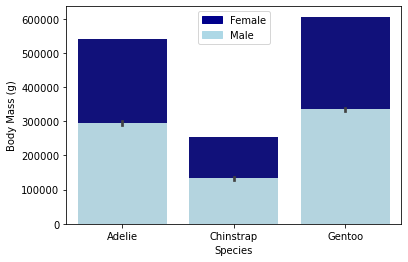

In [64]:
# top bar -> sum all values(male=No and male=Yes) to find y position of the bars
total = penguins.groupby("Species")["Body Mass (g)"].sum().reset_index()

# bar chart 1 -> top bars (group of 'male=No')
bar1 = sns.barplot(x = "Species",  y = "Body Mass (g)", data = total, color = "darkblue")

# bottom bar ->  take only male=Yes values from the data
male = penguins[penguins.Sex == 'MALE']

# bar chart 2 -> bottom bars (group of 'male=Yes')
bar2 = sns.barplot(x = "Species", y = "Body Mass (g)", data = male, estimator = sum, color = "lightblue")

# Add legend
top_bar = mpatches.Patch(color = "darkblue", label = "Female")
bottom_bar = mpatches.Patch(color = "lightblue", label = "Male")
plt.legend(handles=[top_bar, bottom_bar])

# Display the graph
plt.show()

# Tips
+ Make sure you feel comfortable with the content you learned in Lesson 3 before attempting this extra material.
+ Always remember to load the necessary libraries.
+ Name your variables, dataframes, and labels helpful and informative titles.
+ If you get stuck, use the help documentation that you learned in our first lecture to help you troubleshoot!

## References
* https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b 
* Navlani, Avinash, Armando Fandango, and Ivan Idris. 2021. Python Data Analysis. Third Edition. Birmingham: Packt Publishing.
* Python Data Analysis - Third Edition. (2019). Jupyter Notebook. Packt. https://github.com/PacktPublishing/Python-Data-Analysis-Third-Edition/blob/e1cd8029a1830fe5ecc86379ab361d215e71f036/Chapter05/HR_comma_sep.csv. Accessed July 7, 2022.